In [1]:
import findspark 

location = findspark.find()
findspark.init(location)

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('HouseTest').getOrCreate()

In [2]:
spark.sparkContext

<SparkContext master=local[*] appName=HouseTest>

In [3]:
# entrambi i csv presentano una riga di header con lo schema completo dei record successivi, 
# per cui la struttura viene ricavata automaticamente tramite il parametro inferSchema

datasets = {'trainDF': spark.read.csv('./datasets/train.csv', header=True, inferSchema=True),
            'testDF': spark.read.csv('./datasets/test.csv', header=True, inferSchema=True)}

In [4]:
# ------------------------------------ VISUALIZZAZIONE DEL DATASET ------------------------------------

In [5]:
# discussione sul metodo toPandas()

In [6]:
# rimozione duplicati
for df in datasets.values():
    df = df.drop_duplicates()

In [7]:
datasets['trainDF'].printSchema()
print(f"Numero di righe del training set: {datasets['trainDF'].count()}")
datasets['trainDF'].limit(10).toPandas()

root
 |-- Id: integer (nullable = true)
 |-- MSSubClass: integer (nullable = true)
 |-- MSZoning: string (nullable = true)
 |-- LotFrontage: string (nullable = true)
 |-- LotArea: integer (nullable = true)
 |-- Street: string (nullable = true)
 |-- Alley: string (nullable = true)
 |-- LotShape: string (nullable = true)
 |-- LandContour: string (nullable = true)
 |-- Utilities: string (nullable = true)
 |-- LotConfig: string (nullable = true)
 |-- LandSlope: string (nullable = true)
 |-- Neighborhood: string (nullable = true)
 |-- Condition1: string (nullable = true)
 |-- Condition2: string (nullable = true)
 |-- BldgType: string (nullable = true)
 |-- HouseStyle: string (nullable = true)
 |-- OverallQual: integer (nullable = true)
 |-- OverallCond: integer (nullable = true)
 |-- YearBuilt: integer (nullable = true)
 |-- YearRemodAdd: integer (nullable = true)
 |-- RoofStyle: string (nullable = true)
 |-- RoofMatl: string (nullable = true)
 |-- Exterior1st: string (nullable = true)
 |--

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000
5,6,50,RL,85,14115,Pave,NA,IR1,Lvl,AllPub,...,0,NA,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75,10084,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,8,2007,WD,Normal,307000
7,8,60,RL,NA,10382,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51,6120,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50,7420,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,1,2008,WD,Normal,118000


In [8]:
print(datasets['testDF'].printSchema())
print(f"Numero di righe del test set: {datasets['testDF'].count()}")
datasets['testDF'].limit(10).toPandas()

root
 |-- Id: integer (nullable = true)
 |-- MSSubClass: integer (nullable = true)
 |-- MSZoning: string (nullable = true)
 |-- LotFrontage: string (nullable = true)
 |-- LotArea: integer (nullable = true)
 |-- Street: string (nullable = true)
 |-- Alley: string (nullable = true)
 |-- LotShape: string (nullable = true)
 |-- LandContour: string (nullable = true)
 |-- Utilities: string (nullable = true)
 |-- LotConfig: string (nullable = true)
 |-- LandSlope: string (nullable = true)
 |-- Neighborhood: string (nullable = true)
 |-- Condition1: string (nullable = true)
 |-- Condition2: string (nullable = true)
 |-- BldgType: string (nullable = true)
 |-- HouseStyle: string (nullable = true)
 |-- OverallQual: integer (nullable = true)
 |-- OverallCond: integer (nullable = true)
 |-- YearBuilt: integer (nullable = true)
 |-- YearRemodAdd: integer (nullable = true)
 |-- RoofStyle: string (nullable = true)
 |-- RoofMatl: string (nullable = true)
 |-- Exterior1st: string (nullable = true)
 |--

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80,11622,Pave,NA,Reg,Lvl,AllPub,...,120,0,NA,MnPrv,NA,0,6,2010,WD,Normal
1,1462,20,RL,81,14267,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74,13830,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,MnPrv,NA,0,3,2010,WD,Normal
3,1464,60,RL,78,9978,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,NA,0,6,2010,WD,Normal
4,1465,120,RL,43,5005,Pave,NA,IR1,HLS,AllPub,...,144,0,NA,NA,NA,0,1,2010,WD,Normal
5,1466,60,RL,75,10000,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,NA,0,4,2010,WD,Normal
6,1467,20,RL,NA,7980,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63,8402,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,NA,0,5,2010,WD,Normal
8,1469,20,RL,85,10176,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,NA,NA,0,2,2010,WD,Normal
9,1470,20,RL,70,8400,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,MnPrv,NA,0,4,2010,WD,Normal


In [9]:
# ------------------------------------ FEATURE EXPLORATION ------------------------------------

In [10]:
# -- analisi del tipo di variabili

from pyspark.sql.functions import col, isnan, isnull

In [11]:
init_cat_vars_est = [item[0] for item in datasets['trainDF'].dtypes if item[1].startswith('string')]
print(f"Stima iniziale del numero di variabili categoriche: {len(init_cat_vars_est)}\n {init_cat_vars_est}")

Stima iniziale del numero di variabili categoriche: 46
 ['MSZoning', 'LotFrontage', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [12]:
init_num_vars_est = [var for var in datasets['trainDF'].columns if var not in init_cat_vars_est and var != 'Id']
print(f"Stima iniziale del numero di variabili numeriche: {len(init_num_vars_est)}\n {init_num_vars_est}")

Stima iniziale del numero di variabili numeriche: 34
 ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [13]:
#
# Basandomi sulle single informazioni sul dataset della competizione di Kaggle, deduco che LotFrontage, MasVnrArea e GarageYrBlt* 
# sono in realtà variabili numeriche, che sono state parsate come categoriche in quanto presentano alcuni valori 'NA' 
# per codificare l'assenza del dato.
# Fonte: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data
#
#
# *nonostante non ci sia una chiara separazione tra l'interpretazione delle variabili 'anno' in termini numerici
# o categorici, risulterà più conveniente trattarle come numeriche 
#

# uso trainDF come riferimento e sostituisco le occorrenza di 'NA' con None, per codificare
# i valori numerici nulli con un elemento che, a differenza della stringa 'NA', possa essere 
# più facilemente interpretato da Python
datasets['trainDF'] = datasets['trainDF'].replace('NA', None)

cat_to_num_vars = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
for var in cat_to_num_vars:
    datasets['trainDF'] = datasets['trainDF'].withColumn(var, col(var).cast('double'))

#
# Allo stesso modo, le variabili numeriche parsate che codificano una suddivisione in classi o un ranking sono in realtà 
# variabili categoriche, come nel caso di MSSubClass, OverallQual e OverallCond.
# Fonte: https://stats.stackexchange.com/questions/430636/is-a-rating-in-a-set-range-a-categorical-or-numerical-variable
#

num_to_cat_vars = ['MSSubClass', 'OverallQual', 'OverallCond']
for var in num_to_cat_vars:
    datasets['trainDF'] = datasets['trainDF'].withColumn(var, col(var).cast('string'))


# sistemo la lista della stima iniziale attraverso il DF trasformato
cat_vars_est = [item[0] for item in datasets['trainDF'].dtypes if item[1].startswith('string')]
num_vars_est = [var for var in datasets['trainDF'].columns if var not in cat_vars_est and var != 'Id']

print(f"Nuova stima del numero delle variabili categoriche di trainDF: {len(cat_vars_est)}\n {cat_vars_est}")
print(f"\nNuova stima del numero di variabili numeriche di trainDF: {len(num_vars_est)}\n {num_vars_est}")

Nuova stima del numero delle variabili categoriche di trainDF: 46
 ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

Nuova stima del numero di variabili numeriche di trainDF: 34
 ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbv

In [14]:
# il numero di variabili categoriche e numeriche è lo stesso di quello iniziale dato che abbiamo 'scambiato'
# lo stesso nuemro di feature (3) da entrambe le parti 

In [15]:
# riporto in testDF le informazioni sulle colonne ricavate in trainDF

datasets['testDF'] = datasets['testDF'].replace('NA', None)

for var in cat_vars_est:
    datasets['testDF'] = datasets['testDF'].withColumn(var, col(var).cast('string'))

num_vars_est_test = [var for var in num_vars_est if var != 'SalePrice'] # SalePrice, in quanto variabile target, non è presente in testDF
for var in num_vars_est_test:
    datasets['testDF'] = datasets['testDF'].withColumn(var, col(var).cast('double'))

In [16]:
# -- analisi variabili nulle

In [17]:
# implemento il comportamento di pandas.DataFrame.isnull

# UDF per sostituire True e False nelle istanze di valori nulli, NA e None
# nei campi non ci sono valori nulli, in senso di mancanti, ma NA e None
def is_null(df):
    return df.select([(isnan(col(column)) | isnull(col(column)) | col(column).contains('NA')) for column in df.columns])

# creo un nuovo DF per ogni dataset tramite il metodo transform con la UDF definita;
# quindi riporto i nomi dei campi all'originale
nullDS = {'trainDF': datasets['trainDF'].transform(is_null).toDF(*datasets['trainDF'].columns), 
            'testDF': datasets['testDF'].transform(is_null).toDF(*datasets['testDF'].columns)}

In [18]:
# conto i valori nulli di ogni colonna ed estraggo i campi in cui c'è almeno 1 valore nullo
def count_nulls(df):
    has_null = []
    for column in df.columns:
        null_count = df.where(col(column) | col(column).isNull()).count()
        if null_count > 0:
            has_null.append((column, null_count))
    return has_null

# istanzio i rispettivi DataFrame in cui memorizzare il conteggio dei nulli
nullCountDS = {}
for name, df in nullDS.items():
    nullCountDS[name] = spark.createDataFrame(count_nulls(df), ['columnWithNulls', 'nullCount'])

In [19]:
nullCountDS['trainDF'].show()

+---------------+---------+
|columnWithNulls|nullCount|
+---------------+---------+
|    LotFrontage|      259|
|          Alley|     1369|
|   Neighborhood|      225|
|     MasVnrType|        8|
|     MasVnrArea|        8|
|       BsmtQual|       37|
|       BsmtCond|       37|
|   BsmtExposure|       38|
|   BsmtFinType1|       37|
|   BsmtFinType2|       38|
|     Electrical|        1|
|    FireplaceQu|      690|
|     GarageType|       81|
|    GarageYrBlt|       81|
|   GarageFinish|       81|
|     GarageQual|       81|
|     GarageCond|       81|
|         PoolQC|     1453|
|          Fence|     1179|
|    MiscFeature|     1406|
+---------------+---------+



In [20]:
nullCountDS['testDF'].show()

+---------------+---------+
|columnWithNulls|nullCount|
+---------------+---------+
|       MSZoning|        4|
|    LotFrontage|      227|
|          Alley|     1352|
|      Utilities|        2|
|   Neighborhood|      218|
|    Exterior1st|        1|
|    Exterior2nd|        1|
|     MasVnrType|       16|
|     MasVnrArea|       15|
|       BsmtQual|       44|
|       BsmtCond|       45|
|   BsmtExposure|       44|
|   BsmtFinType1|       42|
|     BsmtFinSF1|        1|
|   BsmtFinType2|       42|
|     BsmtFinSF2|        1|
|      BsmtUnfSF|        1|
|    TotalBsmtSF|        1|
|   BsmtFullBath|        2|
|   BsmtHalfBath|        2|
+---------------+---------+
only showing top 20 rows



In [21]:
# heatmap

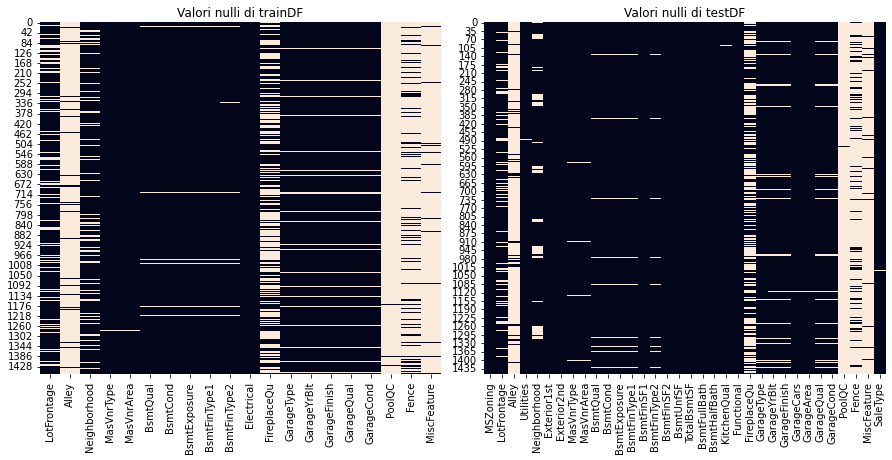

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = [12.50, 6.50]
plt.rcParams["figure.autolayout"] = True

fig, axes = plt.subplots(ncols=2)

for idx, ds in enumerate(nullDS.items()):

    # estraggo le colonne con valori nulli dai DF di nullCountDS
    null_fields_list = [row['columnWithNulls'] for row in nullCountDS[ds[0]].select('columnWithNulls').collect()]

    # creo la heatmap sulla select delle colonne null_fields_list
    sns.heatmap(ds[1].select(*null_fields_list).collect(), ax=axes[idx], xticklabels=null_fields_list, cbar=False)
    axes[idx].set_title(f"Valori nulli di {ds[0]}")

plt.show()

In [23]:
# aggiungo una colonna con la rispettiva percentuale di valori nulli 
for name, df in nullDS.items():
    nullCountDS[name] = nullCountDS[name].withColumn("percentage", col('nullCount')/df.count())

In [24]:
nullCountDS['trainDF'].show()

+---------------+---------+--------------------+
|columnWithNulls|nullCount|          percentage|
+---------------+---------+--------------------+
|    LotFrontage|      259|  0.1773972602739726|
|          Alley|     1369|  0.9376712328767123|
|   Neighborhood|      225|  0.1541095890410959|
|     MasVnrType|        8|0.005479452054794521|
|     MasVnrArea|        8|0.005479452054794521|
|       BsmtQual|       37|0.025342465753424658|
|       BsmtCond|       37|0.025342465753424658|
|   BsmtExposure|       38|0.026027397260273973|
|   BsmtFinType1|       37|0.025342465753424658|
|   BsmtFinType2|       38|0.026027397260273973|
|     Electrical|        1|6.849315068493151E-4|
|    FireplaceQu|      690|  0.4726027397260274|
|     GarageType|       81| 0.05547945205479452|
|    GarageYrBlt|       81| 0.05547945205479452|
|   GarageFinish|       81| 0.05547945205479452|
|     GarageQual|       81| 0.05547945205479452|
|     GarageCond|       81| 0.05547945205479452|
|         PoolQC|   

In [25]:
nullCountDS['testDF'].show()

+---------------+---------+--------------------+
|columnWithNulls|nullCount|          percentage|
+---------------+---------+--------------------+
|       MSZoning|        4|0.002741603838245...|
|    LotFrontage|      227| 0.15558601782042494|
|          Alley|     1352|  0.9266620973269363|
|      Utilities|        2|0.001370801919122...|
|   Neighborhood|      218| 0.14941740918437285|
|    Exterior1st|        1|6.854009595613434E-4|
|    Exterior2nd|        1|6.854009595613434E-4|
|     MasVnrType|       16|0.010966415352981495|
|     MasVnrArea|       15| 0.01028101439342015|
|       BsmtQual|       44| 0.03015764222069911|
|       BsmtCond|       45|0.030843043180260453|
|   BsmtExposure|       44| 0.03015764222069911|
|   BsmtFinType1|       42| 0.02878684030157642|
|     BsmtFinSF1|        1|6.854009595613434E-4|
|   BsmtFinType2|       42| 0.02878684030157642|
|     BsmtFinSF2|        1|6.854009595613434E-4|
|      BsmtUnfSF|        1|6.854009595613434E-4|
|    TotalBsmtSF|   

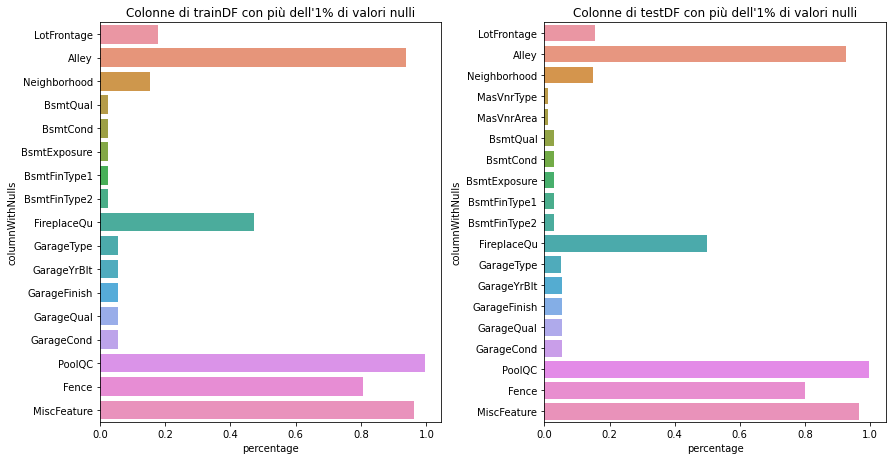

In [26]:
fig, axes = plt.subplots(ncols=2)

# uso toPandas() dato che sto visualizzando un DF risultato di una aggregazione e non sul DF di partenza intero
for idx, ds in enumerate(nullCountDS.items()):
    sns.barplot(x='percentage', y='columnWithNulls',
     data=ds[1].select('columnWithNulls', 'percentage').where(col('percentage') > 0.01).toPandas(),
     ax=axes[idx])
    axes[idx].set_title(f'Colonne di {ds[0]} con più dell\'1% di valori nulli')

plt.show()

In [27]:
# drop delle colonne che hanno più dell'80% di valori nulli
for name in datasets.keys():
    columns_to_be_dropped = [row['columnWithNulls'] 
        for row in nullCountDS[name].select('columnWithNulls').where(col('percentage') > 0.8).collect()]
    #columns_to_be_dropped.append('Id') # rimuovo anche l'Id, di poco significato ai fini dell'addestramento successivo
    print(f'Colonne da droppare in {name}: {columns_to_be_dropped}')
    datasets[name] = datasets[name].drop(*(columns_to_be_dropped))
    nullDS[name] = nullDS[name].drop(*(columns_to_be_dropped))
    nullCountDS[name] = nullCountDS[name].drop(*(columns_to_be_dropped))

    # rimuovo anche i nomi delle colonne dalle liste della precedente suddivisione di feature numeriche e categoriche
    cat_vars_est = [var for var in cat_vars_est if var not in columns_to_be_dropped]
    num_vars_est = [var for var in num_vars_est if var not in columns_to_be_dropped]

Colonne da droppare in trainDF: ['Alley', 'PoolQC', 'Fence', 'MiscFeature']
Colonne da droppare in testDF: ['Alley', 'PoolQC', 'Fence', 'MiscFeature']


In [28]:
# controllo che effettivamente sia avvenuto il drop
datasets['trainDF'].printSchema()

root
 |-- Id: integer (nullable = true)
 |-- MSSubClass: string (nullable = true)
 |-- MSZoning: string (nullable = true)
 |-- LotFrontage: double (nullable = true)
 |-- LotArea: integer (nullable = true)
 |-- Street: string (nullable = true)
 |-- LotShape: string (nullable = true)
 |-- LandContour: string (nullable = true)
 |-- Utilities: string (nullable = true)
 |-- LotConfig: string (nullable = true)
 |-- LandSlope: string (nullable = true)
 |-- Neighborhood: string (nullable = true)
 |-- Condition1: string (nullable = true)
 |-- Condition2: string (nullable = true)
 |-- BldgType: string (nullable = true)
 |-- HouseStyle: string (nullable = true)
 |-- OverallQual: string (nullable = true)
 |-- OverallCond: string (nullable = true)
 |-- YearBuilt: integer (nullable = true)
 |-- YearRemodAdd: integer (nullable = true)
 |-- RoofStyle: string (nullable = true)
 |-- RoofMatl: string (nullable = true)
 |-- Exterior1st: string (nullable = true)
 |-- Exterior2nd: string (nullable = true)
 

In [29]:
# per gli altri valori nulli c'è bisogno di un'analisi più approfondita

In [30]:
# -- analisi SalePrice (variabile target)

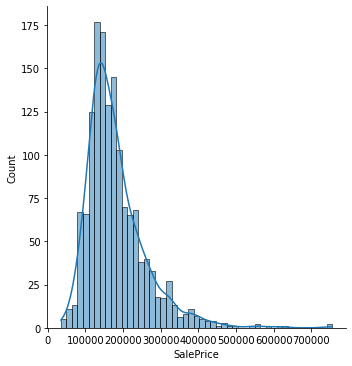

In [31]:
# plotto la distribuzione di SalePrice

sale_prices = [row['SalePrice'] 
        for row in datasets['trainDF'].select('SalePrice').collect()]

sns.displot(sale_prices, kde=True)
plt.xlabel("SalePrice");

In [32]:
# effettuo l'unskewing di SalePrice tramite il logaritmo naturale al fine di avere una distribuzione
# il più vicino possibile ad una gaussiana, come discusso in 
# https://stats.stackexchange.com/questions/299154/the-benefit-of-unskewing-skewed-data
# 
# While log transformation does pretty good job, best fit is unbounded Johnson distribution. ?

from pyspark.sql.functions import log

datasets['trainDF'] = datasets['trainDF'].withColumn('SalePrice', log(col('SalePrice')))

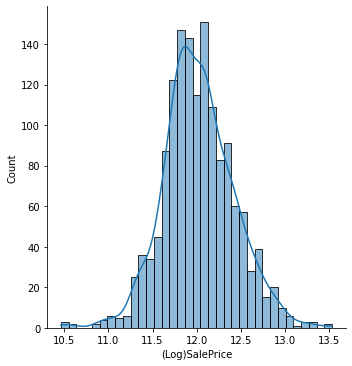

In [33]:
unskewed_prices = [row['SalePrice'] 
        for row in datasets['trainDF'].select('SalePrice').collect()]

sns.displot(unskewed_prices, kde=True)
plt.xlabel("(Log)SalePrice");

In [34]:
# matrice di correlazione

In [35]:
# avevamo già estratto le feature numeriche
num_vars_est

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [36]:
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

# in pyspark è possibile trovare la correlazione di un DF tramite pyspark.ml.stat.Correlation,
# a cui bisogna passare colonne di tipo Vector, che ricaviamo con pyspark.ml.feature.VectorAssempler
vector_col = 'corr_features'
assembler = VectorAssembler(inputCols=num_vars_est, outputCol='corr_features')
df_vector = assembler.transform(datasets['trainDF'].dropna(how="any", subset=num_vars_est)).select(vector_col)

# correlazione di spearman, che funziona meglio per le correlazioni nonlineari
corr_matrix = Correlation.corr(df_vector, vector_col, method='spearman').collect()[0][0].toArray().tolist()

<AxesSubplot:>

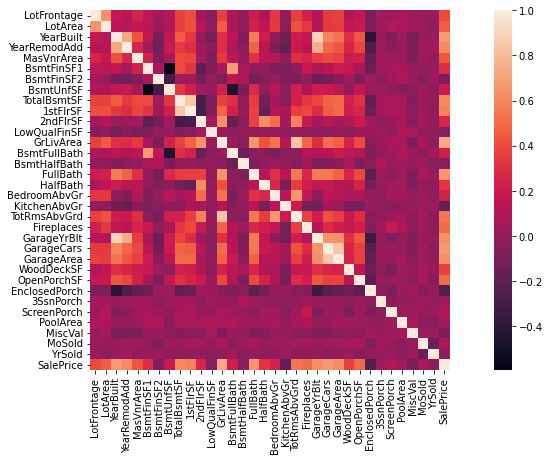

In [37]:
sns.heatmap(corr_matrix, xticklabels=num_vars_est, yticklabels=num_vars_est, square=True)

In [38]:
# estraggo le feature con maggior correlazione (> 0.5) con SalePrice
corr_threshold = 0.5

# considero l'ultima riga della matrice di correlazione, quella relativa a SalePrice 
saleprice_corr = corr_matrix[-1]

high_corr_num_vars = [num_vars_est[i] 
    for i in [idx for idx in range(len(saleprice_corr)) if saleprice_corr[idx] > corr_threshold] if num_vars_est[i] != 'SalePrice']

print(f"{len(high_corr_num_vars)} variabili numeriche maggiormente correlate con SalePrice:\n {high_corr_num_vars}")

12 variabili numeriche maggiormente correlate con SalePrice:
 ['YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'OpenPorchSF']


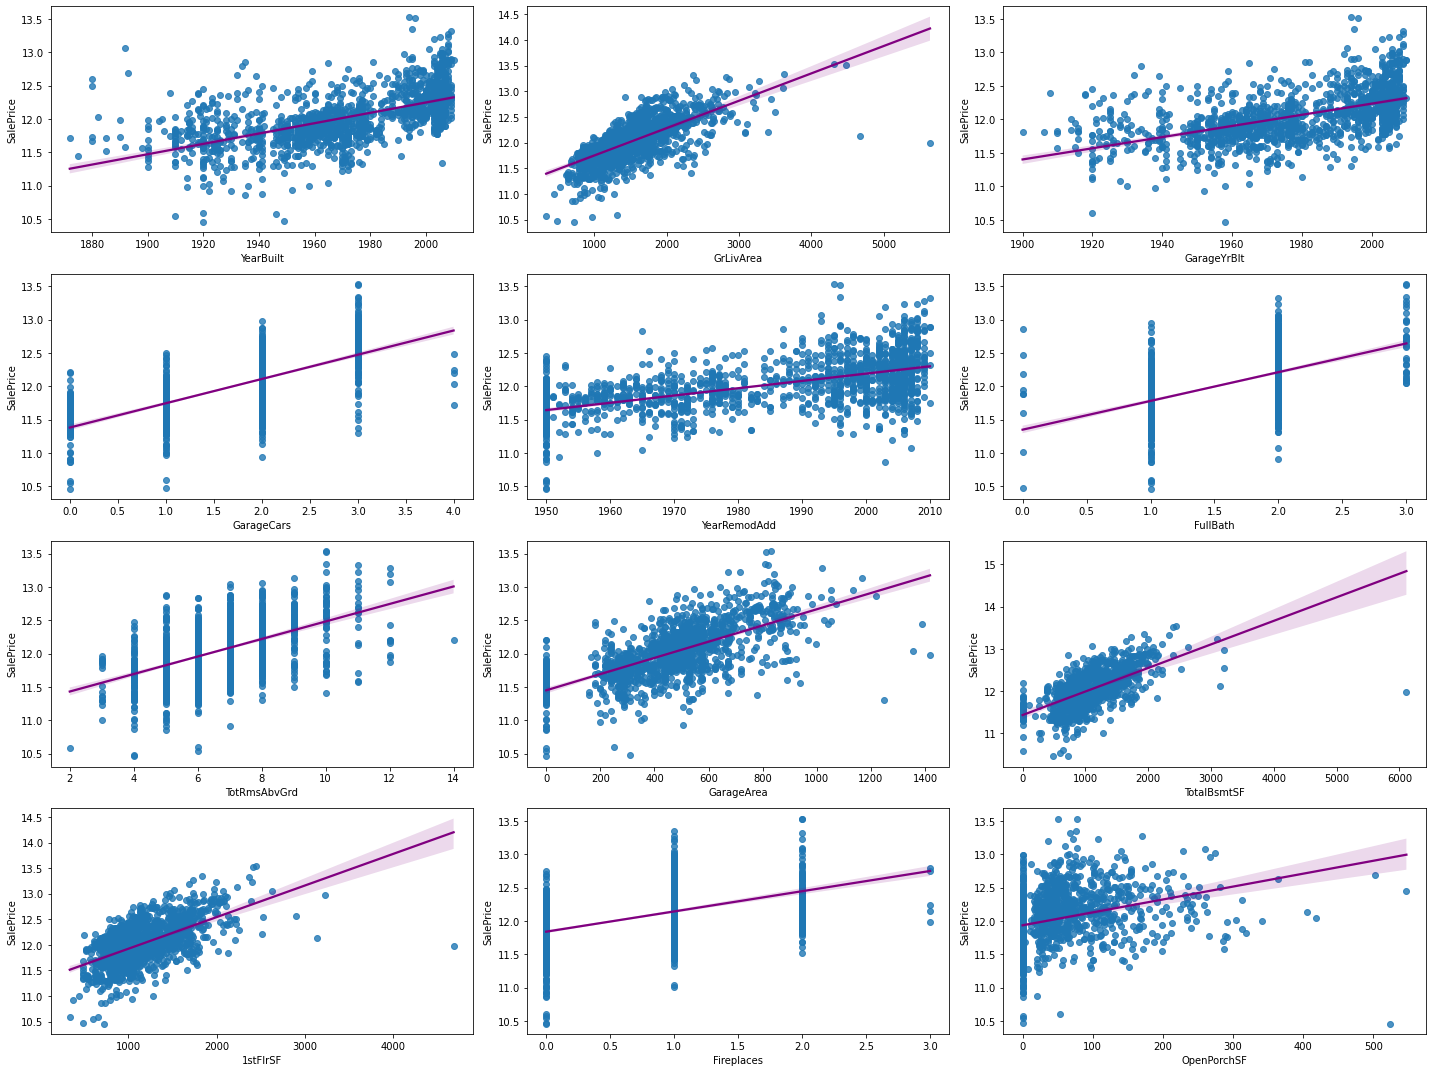

In [39]:
# plot della dipendenza di SalePrice rispetto alle variabili di high_corr_num_vars
#
# sfrutto regplot perchè permette di visualizzare anche la regressione lineare dell'input sopra il classico scatterplot

fig, axes = plt.subplots(4, 3, figsize = (20, 15))

for idx, high_corr_var in enumerate(high_corr_num_vars):
    sns.regplot(x=high_corr_var, y='SalePrice', 
                data=datasets['trainDF'].select(high_corr_var, 'SalePrice').toPandas(), 
                ax=axes[idx%4, idx%3], line_kws={'color': 'purple'})

In [40]:
# l'osservazione degli scatterplot suggerisce la presenza di outlier 
# per le feature 1stFlrSF, GrLivArea, GarageArea, TotalBsmtSF e TotRmsAbvGrd
#
# di conseguenza, rimuovo da trainDF i record 'sporchi'

# deduco il valore su cui basare il filtraggio direttamente dal plot
datasets['trainDF'] = datasets['trainDF'].filter((col('GrLivArea') < 4670) &
                                                 (col('GarageArea') < 1240) &
                                                 (col('TotalBsmtSF') < 4000) &
                                                 (col('1stFlrSF') < 3500) & 
                                                 (col('TotRmsAbvGrd') < 13))

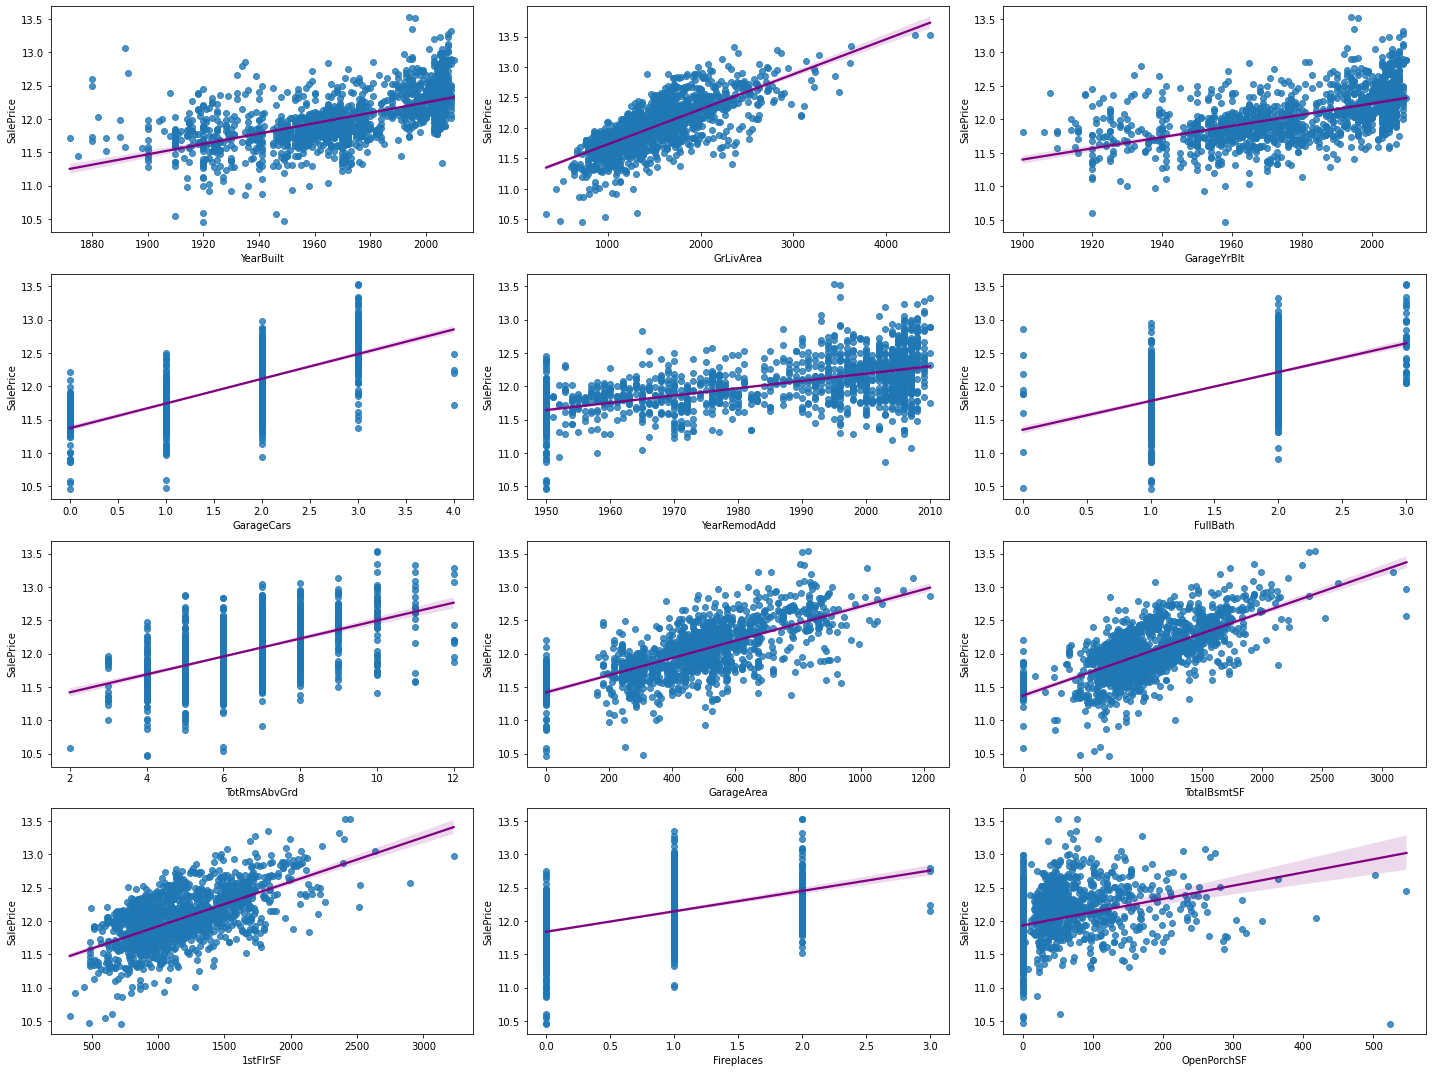

In [41]:
# eseguo nuovamente il plot per visualizzare i dati senza outlier

fig, axes = plt.subplots(4, 3, figsize = (20, 15))

for idx, high_corr_var in enumerate(high_corr_num_vars):
    sns.regplot(x=high_corr_var, y='SalePrice', 
                data=datasets['trainDF'].select(high_corr_var, 'SalePrice').toPandas(), 
                ax=axes[idx%4, idx%3], line_kws={'color': 'purple'})

In [42]:
# vedo se ci sono campi delle feature a maggior correlazione con valori nulli

for name, df in nullCountDS.items():
    print(f'Variabili di {name} a maggior correlazione con SalePrice che hanno valori nulli:')
    df.select('columnWithNulls', 'nullCount')\
                        .filter(col('columnWithNulls').isin(high_corr_num_vars)).show()

Variabili di trainDF a maggior correlazione con SalePrice che hanno valori nulli:
+---------------+---------+
|columnWithNulls|nullCount|
+---------------+---------+
|    GarageYrBlt|       81|
+---------------+---------+

Variabili di testDF a maggior correlazione con SalePrice che hanno valori nulli:
+---------------+---------+
|columnWithNulls|nullCount|
+---------------+---------+
|    TotalBsmtSF|        1|
|    GarageYrBlt|       78|
|     GarageCars|        1|
|     GarageArea|        1|
+---------------+---------+



In [43]:
from pyspark.sql.functions import count, when 

In [44]:
# GarageYrBlt (train e test)

# riempio i valori mancanti dell'anno di costruzione del garage con l'anno di costruzione della casa,
# sull'ipotesi che nella maggior parte dei casi il garage è stato costruito assieme alla casa

for name in datasets.keys():
    datasets[name] = datasets[name].withColumn('GarageYrBlt', when(col('GarageYrBlt').isNull(), col('YearBuilt')).otherwise(col('GarageYrBlt')))

In [45]:
# controllo che i valori nulli di GarageYrBlt siano stati effettivamente rimossi

for df in datasets.values():
   df.select(count(when(isnan('GarageYrBlt') | col('GarageYrBlt').isNull(), 'GarageYrBlt')).alias('GarageYrBlt')
      ).show()

+-----------+
|GarageYrBlt|
+-----------+
|          0|
+-----------+

+-----------+
|GarageYrBlt|
+-----------+
|          0|
+-----------+



In [46]:
# TotalBsmtSF, GarageCars, GarageArea (test)

# solo 1 valore mancante in tutte e tre le variabili, che sostituisco con la media calcolata sulle altre righe
# 
# eseguo il floor della media calcolata per tenere conto del fatto che GarageCars è in realtà un valore intero

from math import floor

missing_num_vars = ['TotalBsmtSF', 'GarageCars', 'GarageArea']

for var in missing_num_vars:
    datasets['testDF'] = datasets['testDF'].fillna(floor(datasets['testDF'].agg({var: 'avg'}).collect()[0][0]), [var])

In [47]:
# verifico l'operazione 
for var in missing_num_vars:
      datasets['trainDF'].select(count(when(isnan(var) | col(var).isNull(), var)).alias(var)
            ).show()

+-----------+
|TotalBsmtSF|
+-----------+
|          0|
+-----------+

+----------+
|GarageCars|
+----------+
|         0|
+----------+

+----------+
|GarageArea|
+----------+
|         0|
+----------+



In [48]:
# -- variabili categoriche

In [49]:
# aggiorno i DF con il conteggio dei valori nulli, dopo che sia colonne che righe sono state rimosse nelle elaborazioni precedenti
nullDS = {'trainDF': datasets['trainDF'].transform(is_null).toDF(*datasets['trainDF'].columns), 
            'testDF': datasets['testDF'].transform(is_null).toDF(*datasets['testDF'].columns)}

for name, df in nullDS.items():
    nullCountDS[name] = spark.createDataFrame(count_nulls(df), ['columnWithNulls', 'nullCount'])


In [50]:
nullCountDS['trainDF'].show()

+---------------+---------+
|columnWithNulls|nullCount|
+---------------+---------+
|    LotFrontage|      258|
|   Neighborhood|      225|
|     MasVnrType|        8|
|     MasVnrArea|        8|
|       BsmtQual|       37|
|       BsmtCond|       37|
|   BsmtExposure|       38|
|   BsmtFinType1|       37|
|   BsmtFinType2|       38|
|     Electrical|        1|
|    FireplaceQu|      688|
|     GarageType|       80|
|   GarageFinish|       80|
|     GarageQual|       80|
|     GarageCond|       80|
+---------------+---------+



In [51]:
nullCountDS['testDF'].show()

+---------------+---------+
|columnWithNulls|nullCount|
+---------------+---------+
|       MSZoning|        4|
|    LotFrontage|      227|
|      Utilities|        2|
|   Neighborhood|      218|
|    Exterior1st|        1|
|    Exterior2nd|        1|
|     MasVnrType|       16|
|     MasVnrArea|       15|
|       BsmtQual|       44|
|       BsmtCond|       45|
|   BsmtExposure|       44|
|   BsmtFinType1|       42|
|     BsmtFinSF1|        1|
|   BsmtFinType2|       42|
|     BsmtFinSF2|        1|
|      BsmtUnfSF|        1|
|   BsmtFullBath|        2|
|   BsmtHalfBath|        2|
|    KitchenQual|        1|
|     Functional|        2|
+---------------+---------+
only showing top 20 rows



In [52]:
# riempio i valori nulli con la moda

for name in datasets.keys():

    # estraggo le variabili categoriche con valori nulli
    null_cat_vars = [row['columnWithNulls'] 
        for row in nullCountDS[name].select('columnWithNulls').where(col('columnWithNulls').isin(cat_vars_est)).collect()]

    for var in null_cat_vars:

        # calcolo la moda contando le righe aggregate per ogni variabile di null_cat_vars
        # ed estraendo il campo var della riga con valore 'count' massimo
        var_count = datasets[name].groupBy(var).count()
        var_mode = var_count.filter(col('count') == var_count.agg({'count': 'max'}).collect()[0][0]).select(var).collect()[0][0]
        print(f'Moda di {var}: {var_mode}')

        datasets[name] = datasets[name].fillna('None' if var_mode == None else var_mode, [var])

Moda di Neighborhood: NAmes
Moda di MasVnrType: None
Moda di BsmtQual: TA
Moda di BsmtCond: TA
Moda di BsmtExposure: No
Moda di BsmtFinType1: Unf
Moda di BsmtFinType2: Unf
Moda di Electrical: SBrkr
Moda di FireplaceQu: None
Moda di GarageType: Attchd
Moda di GarageFinish: Unf
Moda di GarageQual: TA
Moda di GarageCond: TA
Moda di MSZoning: RL
Moda di Utilities: AllPub
Moda di Neighborhood: NAmes
Moda di Exterior1st: VinylSd
Moda di Exterior2nd: VinylSd
Moda di MasVnrType: None
Moda di BsmtQual: TA
Moda di BsmtCond: TA
Moda di BsmtExposure: No
Moda di BsmtFinType1: GLQ
Moda di BsmtFinType2: Unf
Moda di KitchenQual: TA
Moda di Functional: Typ
Moda di FireplaceQu: None
Moda di GarageType: Attchd
Moda di GarageFinish: Unf
Moda di GarageQual: TA
Moda di GarageCond: TA
Moda di SaleType: WD


In [53]:
# verifico l'operazione 

null_cat_vars = [row['columnWithNulls'] 
        for row in nullCountDS['trainDF'].select('columnWithNulls').where(col('columnWithNulls').isin(cat_vars_est)).collect()]
for var in null_cat_vars:
      datasets['trainDF'].select(count(when(isnan(var) | col(var).isNull(), var)).alias(var)
            ).show()

+------------+
|Neighborhood|
+------------+
|           0|
+------------+

+----------+
|MasVnrType|
+----------+
|         0|
+----------+

+--------+
|BsmtQual|
+--------+
|       0|
+--------+

+--------+
|BsmtCond|
+--------+
|       0|
+--------+

+------------+
|BsmtExposure|
+------------+
|           0|
+------------+

+------------+
|BsmtFinType1|
+------------+
|           0|
+------------+

+------------+
|BsmtFinType2|
+------------+
|           0|
+------------+

+----------+
|Electrical|
+----------+
|         0|
+----------+

+-----------+
|FireplaceQu|
+-----------+
|          0|
+-----------+

+----------+
|GarageType|
+----------+
|         0|
+----------+

+------------+
|GarageFinish|
+------------+
|           0|
+------------+

+----------+
|GarageQual|
+----------+
|         0|
+----------+

+----------+
|GarageCond|
+----------+
|         0|
+----------+



In [54]:
# -- feature engineering

In [55]:
# skewed_features = all_data[num_features].apply(lambda x: x.dropna().skew())
# skewed_features = skewed_features[skewed_features > 0.5].index
# print("\nHighly skewed features: \n\n{}".format(skewed_features.tolist()))

In [56]:
# unskewing
#
# come già visto per SalePrice, risulta utile effettuare l'unskewing delle feature numeriche
# nel caso in cui la loro distrbuzione non sia esattamente normale

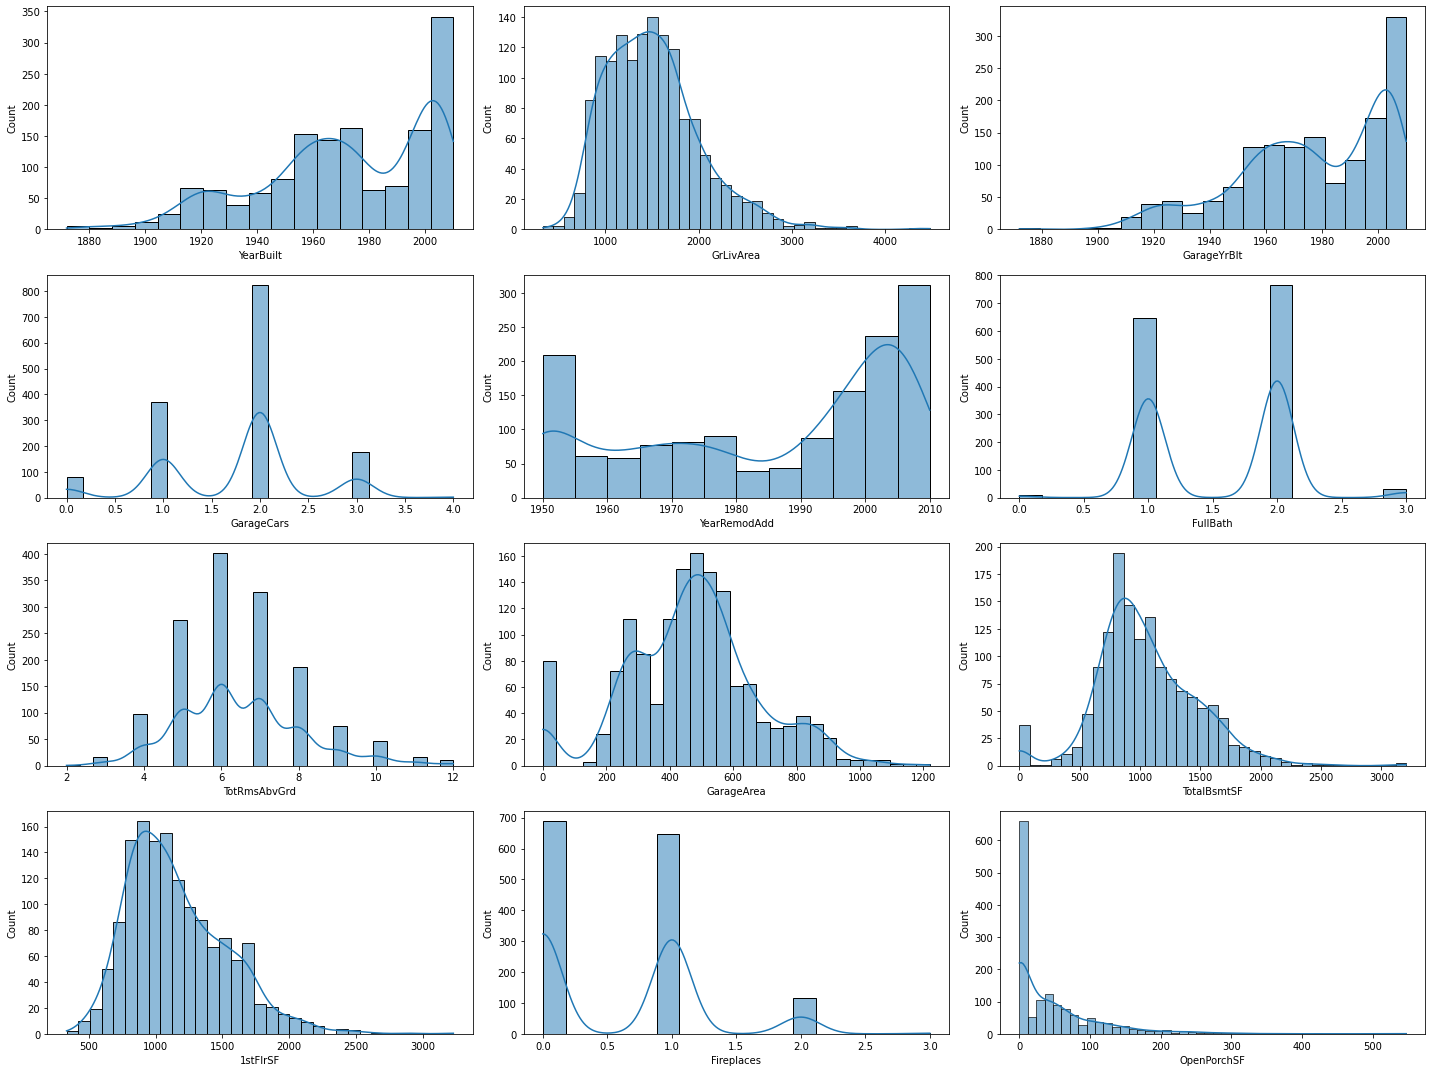

In [57]:
fig, axes = plt.subplots(4, 3, figsize = (20, 15))

for idx, high_corr_var in enumerate(high_corr_num_vars):
    vals = [row[high_corr_var] 
        for row in datasets['trainDF'].select(high_corr_var).collect()]
    sns.histplot(data=vals, ax=axes[idx%4, idx%3], kde=True)
    axes[idx%4, idx%3].set(xlabel=high_corr_var)

In [58]:
from pyspark.sql.functions import skewness

# UDF per la skewness delle variabili numeriche a maggior correlazione
def eval_skew(df):
    skew = []
    for column in high_corr_num_vars:
        col_skew = df.select(skewness(column).alias(column)).collect()[0][0]
        skew.append((column, col_skew))
    return skew


skew_threshold = 0.5

# creo dei DF per la skewness
skewDS = {}
for name, df in datasets.items():
    skewDS[name] = spark.createDataFrame(eval_skew(df), ['column', 'skewness'])
    skewDS[name].show()

+------------+--------------------+
|      column|            skewness|
+------------+--------------------+
|   YearBuilt| -0.6149263863481762|
|YearRemodAdd| -0.5018955921147209|
| TotalBsmtSF|  0.5112279963444407|
|    1stFlrSF|  0.8900382453081863|
|   GrLivArea|  0.9984430949386278|
|    FullBath|0.031142647406032394|
|TotRmsAbvGrd|  0.6156046464785498|
|  Fireplaces|  0.6316511613424985|
| GarageYrBlt| -0.6903770307895747|
|  GarageCars|-0.35632566562432827|
|  GarageArea|0.021335502171374053|
| OpenPorchSF|   2.339731325567455|
+------------+--------------------+

+------------+--------------------+
|      column|            skewness|
+------------+--------------------+
|   YearBuilt| -0.5870522646411163|
|YearRemodAdd|-0.39949472741730246|
| TotalBsmtSF|  0.8130311050679861|
|    1stFlrSF|  1.5565921331805246|
|   GrLivArea|    1.12923991364573|
|    FullBath|  0.2955344004426562|
|TotRmsAbvGrd|  0.8417309232677174|
|  Fireplaces|  0.8190151321542428|
| GarageYrBlt|-0.2582199338

In [59]:
# effettuo l'unskewing tramite la trasformazione Yeo-Johnson, 
# che a differenza della Box-Cox tiene conto anche conto di input negativi
#
# Fonte: Yeo and R.A. Johnson, "A New Family of Power Transformations to Improve Normality or Symmetry", Biometrika 87.4 (2000)

# from pyspark.sql.functions import udf
# from pyspark.sql.types import DoubleType
from scipy.stats import yeojohnson
from pyspark.sql import Row

for name in datasets.keys():
    for column in high_corr_num_vars:

        # # il metodo yeojohnson, nel caso in cui non venga specificato il parametro lambda per la trasformazione,
        # # lo stima automaticamente secondo la log likelihood stimata su tutta la colonna
        # #
        # unskewed_values, lambda_ = yeojohnson([row[column] for row in datasets[name].select(column).collect()])
        # print(f'lambda stimato per {column}: {lambda_}')

        # # yeojohnson() ritorna dati del tipo virgola mobile di numpy, per cui eseguo il cast ad un tipo primitivo di Python
        # # per facilitare l'inferenza automatica del tipo da parte di Spark
        # #
        # unskewed_values = [float(val) for val in unskewed_values]

        # # aggiorno i valori creando un DF ausiliario con una sola colonna (oltre l'Id), su cui effettuo il join
        # # con il DF principale, dopo avere opportunamente droppato la colonna con valori 'skewed'
        # #
        # # a tale fine, calcolo l'Id da associare ad ogni riga, che non posso generare incrementalmente dato che 
        # # nei DF precedenti abbiamo droppato alcune righe e la corrispondenza non sarebbe valida;

        # # estraggo gli Id del DF di partenza
        # new_ids = [row['Id'] for row in datasets[name].select('Id').collect()]

        # # li associo ai valori 'unskewed'
        # unskewed_column = [Row(Id=new_ids[i], column=val) for i, val in enumerate(unskewed_values)]

        # # eseguo il join tra i due DF su 'Id'
        # unskewed_columnDF = spark.createDataFrame(unskewed_column, ['Id', column])
        # datasets[name] = datasets[name].drop(column).join(unskewed_columnDF, 'Id')

        datasets[name] = datasets[name].withColumn(column, log(col(column)))


datasets['trainDF'].toPandas()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,12.247694
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,12.109011
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,12.317167
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,11.849398
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1449,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,12.072541
1450,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,12.254863
1451,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,12.493130
1452,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,11.864462


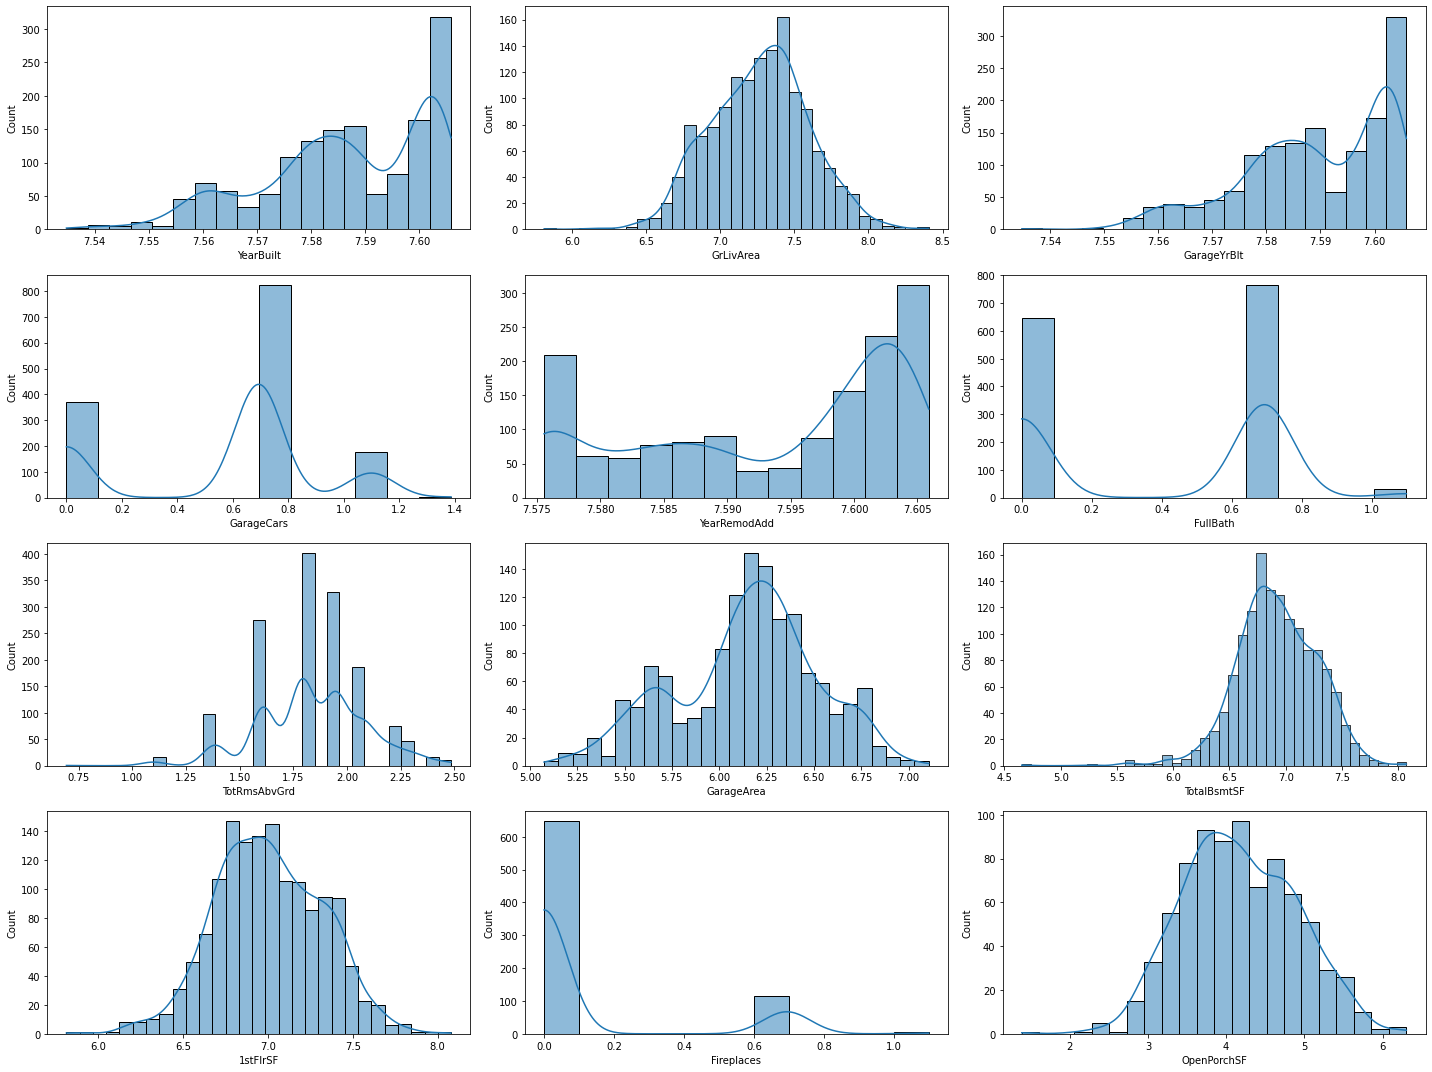

In [60]:
# plotto le distribuzioni trasformate
fig, axes = plt.subplots(4, 3, figsize = (20, 15))

for idx, high_corr_var in enumerate(high_corr_num_vars):
    vals = [row[high_corr_var] 
        for row in datasets['trainDF'].select(high_corr_var).collect()]
    sns.histplot(data=vals, ax=axes[idx%4, idx%3], line_kws={'color': 'purple'}, kde=True)
    axes[idx%4, idx%3].set(xlabel=high_corr_var)

In [61]:
# unskewing
# cat to num?
# one-hot encoding per variabili categoriche

In [62]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import IndexToString
from pyspark.ml.feature import OneHotEncoder
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.tuning import ParamGridBuilder
from pyspark.ml.tuning import CrossValidator
from pyspark.ml.evaluation import RegressionEvaluator

In [63]:
# i valori sono tutti gli stessi -> rimuovere all'inizio

cat_vars_est.remove('Utilities') 

for name in datasets.keys():
    datasets[name] = datasets[name].drop('Utilities')

In [64]:
high_corr_num_vars

['YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'OpenPorchSF']

In [65]:
# le feature di addestramento sono quelle numeriche a maggior correlazione assieme a quelle categoriche
training_features = high_corr_num_vars + cat_vars_est

training_features

['YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'OpenPorchSF',
 'MSSubClass',
 'MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [66]:
# estraggo il df con le feature rilevanti -> mettere prima?
datasets['trainDF'] = datasets['trainDF'].select('Id', 'SalePrice', *training_features)
datasets['testDF'] = datasets['testDF'].select('Id', *training_features)

In [67]:
indexers_list = [StringIndexer(inputCol=column, outputCol=column+'_idx', handleInvalid='keep').fit(datasets['trainDF']) for column in cat_vars_est]

In [68]:
for name in datasets.keys():
    prepr_pipeline = Pipeline(stages=indexers_list)
    datasets[name] = prepr_pipeline.fit(datasets[name]).transform(datasets[name])

In [69]:
print(len(datasets['trainDF'].columns))
print(len(datasets['testDF'].columns))

96
95


In [70]:
input_cols = [feat + '_idx' if feat in cat_vars_est else feat for feat in training_features]

In [71]:
datasets['trainDF'] = datasets['trainDF'].select(*input_cols, 'SalePrice')
datasets['testDF'] = datasets['testDF'].select('Id', *input_cols)

In [72]:
assembler = VectorAssembler(inputCols=datasets['trainDF'].drop('SalePrice').columns, outputCol='features', handleInvalid='keep')

In [73]:
train_vector = assembler.transform(datasets['trainDF'])

In [74]:
assembler2 = VectorAssembler(inputCols=datasets['testDF'].drop('Id').columns, outputCol='features', handleInvalid='keep')

In [75]:
test_vector = assembler2.transform(datasets['testDF'])

In [76]:
# sale_prices = [row['SalePrice'] for row in datasets['trainDF'].select('SalePrice').collect()]


# sale_prices_colm = [Row(SalePrice=val) for val in sale_prices]


# sale_prices_colmDF = spark.createDataFrame(sale_prices_colm, ['SalePrice'])
# predictions = predictions.join(sale_prices_colmDF, col('SalePrice'))

In [77]:
randomForest = RandomForestRegressor(featuresCol='features', labelCol='SalePrice')

In [78]:
import numpy as np
paramGrid = ParamGridBuilder() \
    .addGrid(randomForest.numTrees, [int(x) for x in np.linspace(start = 100, stop = 120, num = 3)]) \
    .addGrid(randomForest.maxDepth, [int(x) for x in np.linspace(start = 4, stop = 8, num = 3)]) \
    .build()

In [79]:
# np.arange(start=100, stop=140, step=10)
# np.arange(start=4, stop=10, step=2)

In [80]:
# 10-fold cross validation
crossval = CrossValidator(estimator=randomForest,
                          estimatorParamMaps=paramGrid,
                          evaluator=RegressionEvaluator(metricName='rmse', labelCol='SalePrice'),
                          numFolds=10)

In [82]:
# addestramento
cvModel = crossval.fit(train_vector)

AnalysisException: Cannot resolve column name "label" among (YearBuilt, YearRemodAdd, TotalBsmtSF, 1stFlrSF, GrLivArea, FullBath, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, GarageArea, OpenPorchSF, MSSubClass_idx, MSZoning_idx, Street_idx, LotShape_idx, LandContour_idx, LotConfig_idx, LandSlope_idx, Neighborhood_idx, Condition1_idx, Condition2_idx, BldgType_idx, HouseStyle_idx, OverallQual_idx, OverallCond_idx, RoofStyle_idx, RoofMatl_idx, Exterior1st_idx, Exterior2nd_idx, MasVnrType_idx, ExterQual_idx, ExterCond_idx, Foundation_idx, BsmtQual_idx, BsmtCond_idx, BsmtExposure_idx, BsmtFinType1_idx, BsmtFinType2_idx, Heating_idx, HeatingQC_idx, CentralAir_idx, Electrical_idx, KitchenQual_idx, Functional_idx, FireplaceQu_idx, GarageType_idx, GarageFinish_idx, GarageQual_idx, GarageCond_idx, PavedDrive_idx, SaleType_idx, SaleCondition_idx, SalePrice, features)

In [ ]:
# model = randomForest.fit(train_vector)

In [ ]:
predictions = cvModel.transform(test_vector)

In [ ]:
predictions.printSchema()

In [ ]:
from pyspark.sql.functions import exp
submission = predictions.withColumn('prediction', exp(col('prediction'))).select('Id', col('prediction').alias('SalePrice'))

submission.show(truncate=False)

In [ ]:
# submission.show(n=1459)

In [ ]:
submission.toPandas().to_csv('./predictions/submission_t.csv', header=True, index=False)

In [ ]:
# submission.coalesce(1).write.csv('./predictions/submission_t.csv', header=True, mode='overwrite')

In [ ]:
# addestramento
#
# per la stratified cross-validation: spark-stratifier (https://github.com/interviewstreet/spark-stratifier)